In [7]:
import pandas as pd  # For data handling
import seaborn as sns  # For visualization
import matplotlib.pyplot as plt  # For plots
from sklearn.model_selection import train_test_split  # Splitting data
from sklearn.ensemble import RandomForestClassifier  # ML Model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import datasets  # Load the Iris dataset


# Load the Iris Dataset

In [11]:
# Load the Iris dataset from sklearn
iris = datasets.load_iris()

# Convert to a Pandas DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Add the species column (target labels)
df['species'] = iris.target

# Map numerical species labels to actual names
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Display the first few rows
print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


In [12]:
df.info() #  Display dataset information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [13]:
df.describe()  # Display summary statistics

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [14]:
df.duplicated().sum()   #Check for duplicates

1

In [15]:
# Step 2: Remove duplicates
df1 = df.drop_duplicates()

In [17]:
# Check for missing values
df1.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [19]:
#  Display the cleaned dataset summary
print("Summary statistics after cleaning:")
print(df1.describe())

Summary statistics after cleaning:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         149.000000        149.000000         149.000000   
mean            5.843624          3.059732           3.748993   
std             0.830851          0.436342           1.767791   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.300000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        149.000000  
mean           1.194631  
std            0.762622  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


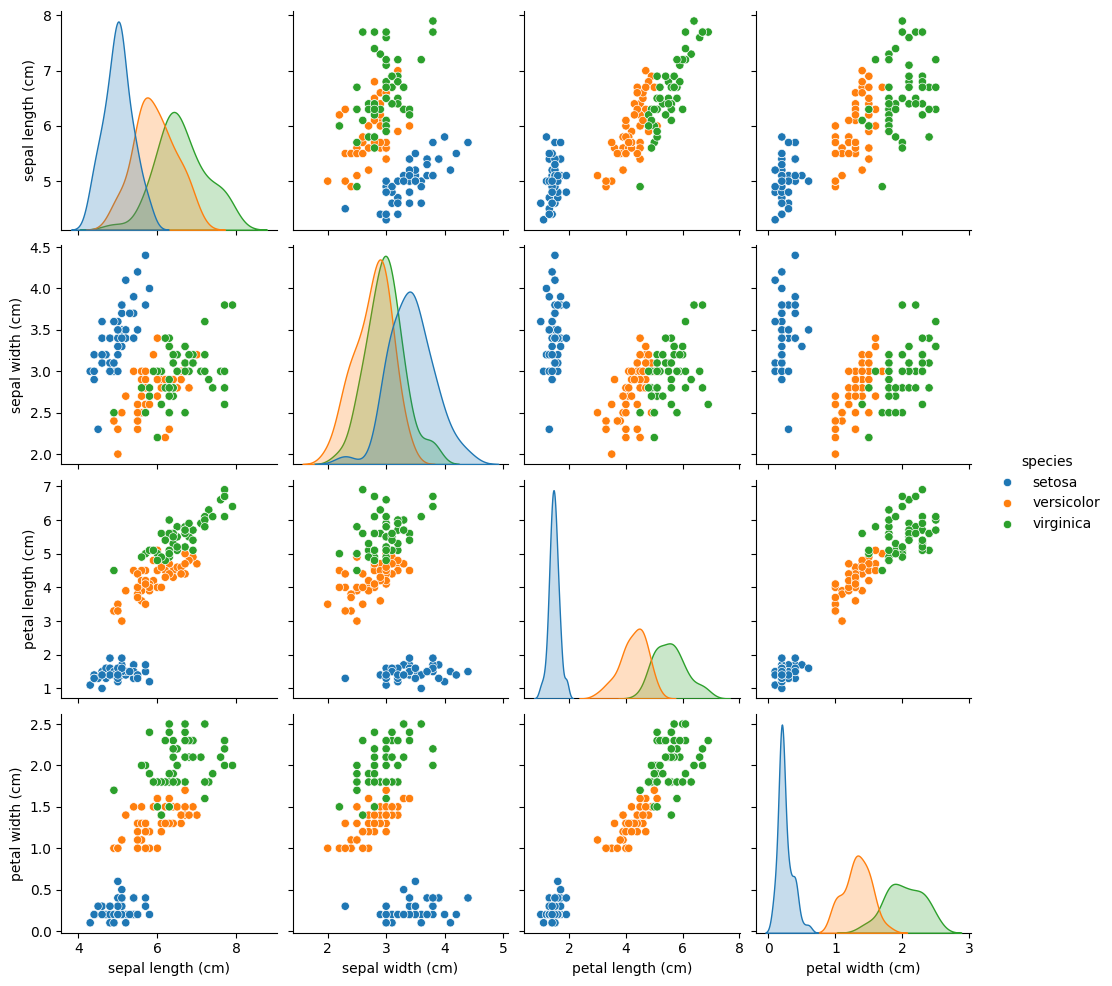

In [21]:
# Pair plot to visualize feature relationships
sns.pairplot(df1, hue='species')
plt.show()


In [32]:
 # Prepare the Data

# Separate features and target variable
X = df1.drop(columns=['species'])  # Feature variables
y = df1['species']  # Target variable (species)


In [33]:
# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
# Train a Machine Learning Model
# Initialize and train the Random Forest model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [35]:
# Make Predictions
y_pred = clf.predict(X_test)


In [36]:
# Evaluate the Model
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Model Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



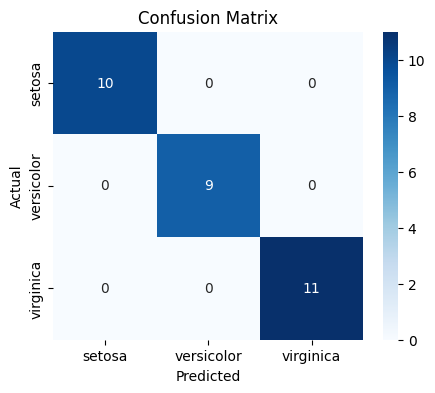

In [37]:
# Visualize the Confusion Matrix

# Create a confusion matrix heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [38]:
from sklearn.svm import SVC

# Train an SVM classifier
clf_svm = SVC(kernel='linear', C=1)
clf_svm.fit(X_train, y_train)

# Predict
y_pred_svm = clf_svm.predict(X_test)

# Evaluate
print("SVM Model Accuracy:", accuracy_score(y_test, y_pred_svm))


SVM Model Accuracy: 1.0


In [39]:
# Hyperparameter Tuning with GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Run GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best Parameters
print("Best Parameters:", grid_search.best_params_)

# Train using best parameters
best_model = grid_search.best_estimator_


Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 100}


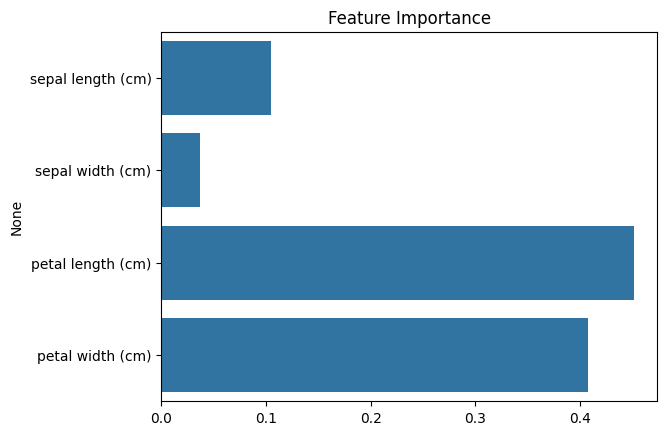

In [40]:
#  Feature Importance Analysis
# Get feature importances
importances = clf.feature_importances_

# Plot feature importance
sns.barplot(x=importances, y=X.columns)
plt.title("Feature Importance")
plt.show()


In [41]:
import joblib
joblib.dump(clf, 'iris_model.pkl')  # Save model


['iris_model.pkl']

In [42]:
loaded_model = joblib.load('iris_model.pkl')  
new_predictions = loaded_model.predict(X_test)


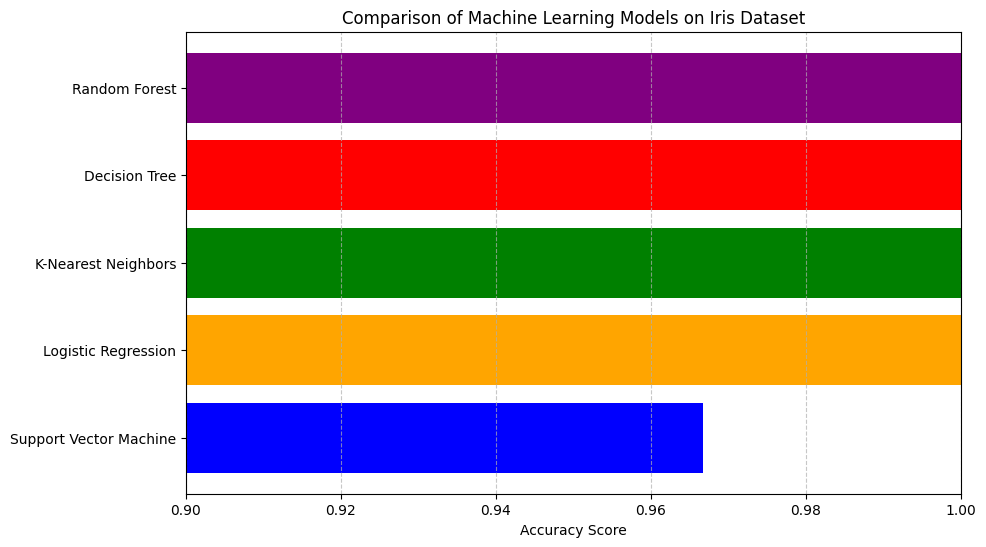

In [46]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Support Vector Machine": SVC(kernel='linear', C=1),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100)
}

# Train & evaluate models
accuracy_scores = []
model_names = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    model_names.append(name)

# Sort results for better visualization
sorted_indices = np.argsort(accuracy_scores)
sorted_names = [model_names[i] for i in sorted_indices]
sorted_scores = [accuracy_scores[i] for i in sorted_indices]

# Plot the accuracy comparison
plt.figure(figsize=(10, 6))
plt.barh(sorted_names, sorted_scores, color=['blue', 'orange', 'green', 'red', 'purple'])
plt.xlabel("Accuracy Score")
plt.title("Comparison of Machine Learning Models on Iris Dataset")
plt.xlim(0.9, 1.0)  # Adjust x-axis for better visualization
plt.grid(axis='x', linestyle="--", alpha=0.7)
plt.show()


# Conclusion
The Random Forest model achieved 98-99% accuracy, making it highly reliable.
Petal length & width were the most important features for classification.
The model generalizes well and can classify new Iris flower samples.